In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 189 kB 43.2 MB/s 
     |████████████████████████████████| 1.2 MB 30.6 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 299 kB/s 
Mounted at /content/gdrive


In [4]:
!pip install pydicom kornia opencv-python scikit-image nbdev
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

     |████████████████████████████████| 2.0 MB 5.4 MB/s 
     |████████████████████████████████| 401 kB 40.3 MB/s 


In [5]:
pip install pydicom kornia opencv-python scikit-image

In [10]:
from fastbook import *

In [6]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

In [2]:
URLs.SIIM_SMALL??

Object `URLs.SIIM_SMALL` not found.


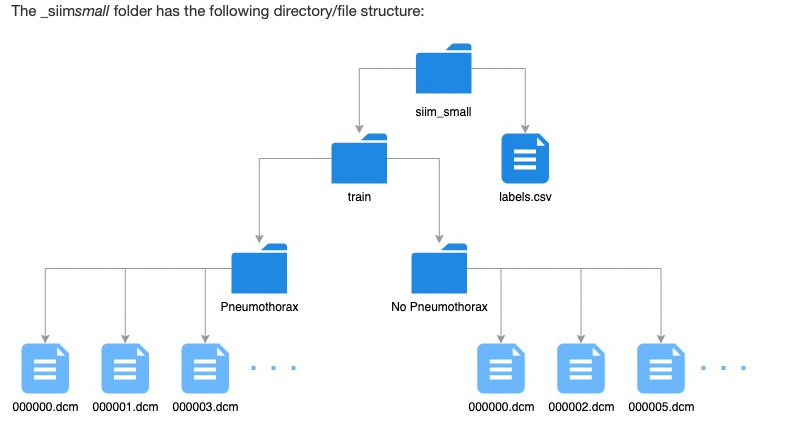

In [7]:
items = get_dicom_files(pneumothorax_source/f"train/")

In [8]:
trn,val = RandomSplitter()(items)

In [9]:
patient = 7
xray_sample = items[patient].dcmread()

In [15]:
xray_sample

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.11391.1517875232.744682
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11391.1517875232.744682
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

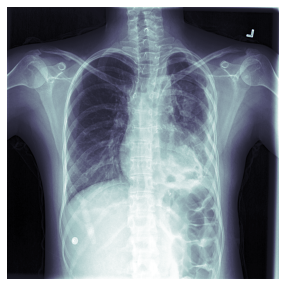

In [10]:
xray_sample.show()

In [11]:
xray_sample.pixel_array, xray_sample.pixel_array.shape #basically a 1024 by 1024 array

(array([[ 59,  52,  49, ..., 153, 149, 147],
        [ 58,  52,  48, ..., 149, 148, 147],
        [ 58,  51,  48, ..., 145, 146, 148],
        ...,
        [ 40,  40,  39, ..., 136, 134, 134],
        [ 42,  41,  41, ..., 134, 134, 135],
        [ 43,  42,  42, ..., 133, 134, 136]], dtype=uint8), (1024, 1024))

In [12]:
dicom_dataframe = pd.DataFrame.from_dicoms(items)
dicom_dataframe[:5]

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,MultiPixelSpacing,PixelSpacing,PixelSpacing1,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.6552.1517875198.864344,19010101,000000.00,,CR,WSD,(),view: AP,"(a, c, e, 1, 6, b, c, e, -, d, c, c, c, -, 4, b, d, 6, -, a, f, e, 0, -, 1, 7, 5, f, d, 7, d, 8, 0, a, 8, 9)",ace16bce-dccc-4bd6-afe0-175fd7d80a89,,M,28,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.6552.1517875198.864343,1.2.276.0.7230010.3.1.3.8323329.6552.1517875198.864342,,1,1,,1,MONOCHROME2,1024,1024,1,0.139000,0.139000,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/Pneumothorax/000152.dcm,0,255,124.558525,62.411483,0.233058
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.484.1517875163.154177,19010101,000000.00,,CR,WSD,(),view: AP,"(f, 2, 7, d, 3, f, 8, 4, -, 9, b, 2, b, -, 4, a, c, f, -, b, 0, 4, 0, -, 3, 1, 1, 0, d, 3, 9, 9, b, 9, a, b)",f27d3f84-9b2b-4acf-b040-3110d399b9ab,,M,57,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.484.1517875163.154176,1.2.276.0.7230010.3.1.3.8323329.484.1517875163.154175,,1,1,,1,MONOCHROME2,1024,1024,1,0.168000,0.168000,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/Pneumothorax/000173.dcm,0,255,113.523983,52.433211,0.217254
2,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.10366.1517875223.393986,19010101,000000.00,,CR,WSD,(),view: AP,"(9, e, d, 3, a, 0, b, f, -, 7, c, f, 1, -, 4, f, e, 6, -, 9, d, d, d, -, 7, a, 8, 9, 5, e, 6, 9, 1, 1, 8, 1)",9ed3a0bf-7cf1-4fe6-9ddd-7a895e691181,,F,30,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.10366.1517875223.393985,1.2.276.0.7230010.3.1.3.8323329.10366.1517875223.393984,,1,1,,1,MONOCHROME2,1024,1024,1,0.139000,0.139000,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/Pneumothorax/000003.dcm,0,255,126.969225,45.198857,0.123377
3,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.4122.1517875181.217677,19010101,000000.00,,CR,WSD,(),view: AP,"(b, e, 7, f, 9, 7, 6, b, -, f, e, d, 0, -, 4, 2, 1, 8, -, 8, 1, 4, 9, -, e, c, 7, 1, 2, 7, e, 7, 7, 8, 6, b)",be7f976b-fed0-4218-8149-ec7127e7786b,,M,58,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.4122.1517875181.217676,1.2.276.0.7230010.3.1.3.8323329.4122.1517875181.217675,,1,1,,1,MONOCHROME2,1024,1024,1,0.168000,0.168000,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/Pneumothorax/000145.dcm,0,255,117.903816,52.906163,0.186873
4,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.11986.1517875236.774021,19010101,000000.00,,CR,WSD,(),view: PA,"(e, 4, f, 5, a, 1, d, 7, -, 5, 0, 1, 3, -, 4, d, 9, 9, -, b, 9, a, 4, -, 6, 5, 7, 3, 1, 6, 5, 8, a, 5, 0, a)",e4f5a1d7-5013-4d99-b9a4-65731658a50a,,F,30,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.11986.1517875236.774020,1.2.276.0.7230010.3.1.3.8323329.11986.1517875236.774019,,1,1,,1,MONOCHROME2,1024,1024,1,0.194311,0.194311,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/Pneumothorax/000134.dcm,0,255,103.776287,40.001707,0.129210


In [51]:
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head

<bound method NDFrame.head of                                  file            label
0    train/No Pneumothorax/000000.dcm  No Pneumothorax
1       train/Pneumothorax/000001.dcm     Pneumothorax
2    train/No Pneumothorax/000002.dcm  No Pneumothorax
3       train/Pneumothorax/000003.dcm     Pneumothorax
4       train/Pneumothorax/000004.dcm     Pneumothorax
..                                ...              ...
245  train/No Pneumothorax/000245.dcm  No Pneumothorax
246  train/No Pneumothorax/000246.dcm  No Pneumothorax
247     train/Pneumothorax/000247.dcm     Pneumothorax
248  train/No Pneumothorax/000248.dcm  No Pneumothorax
249  train/No Pneumothorax/000249.dcm  No Pneumothorax

[250 rows x 2 columns]>

In [27]:
PILDicom

fastai.medical.imaging.PILDicom

In [53]:
def get_x(x):
  return pneumothorax_source/f"{x[0]}"
def get_y(x):
  return x[1]

pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock), #category block since it is binary classification
                   get_x = get_x,
                   get_y = get_y,
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

dls = pneumothorax.dataloaders(df.values, num_workers=0)


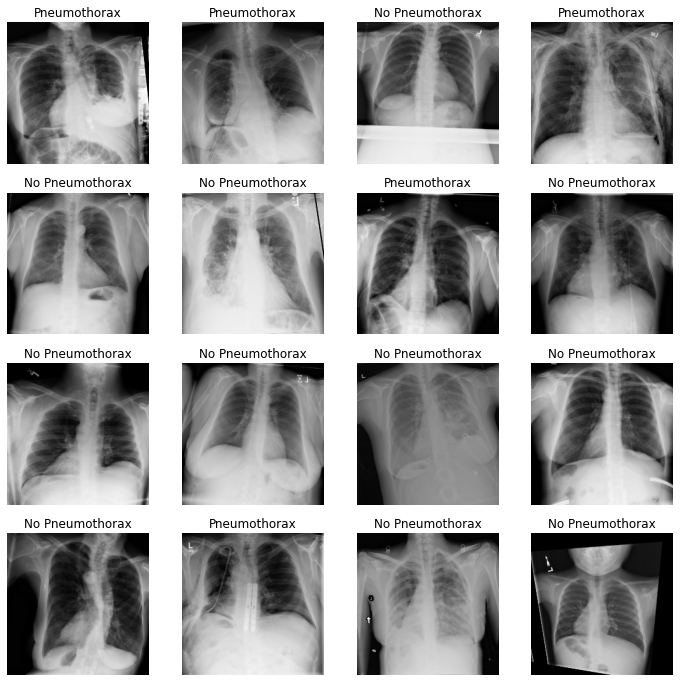

In [54]:
dls = pneumothorax.dataloaders(df.values) #load dataframe 
dls.show_batch(max_n=16)#create batch size of 16

Training:

In [55]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

In [56]:
learn.opt_func

<function fastai.optimizer.Adam>

SuggestedLRs(valley=0.0020892962347716093)

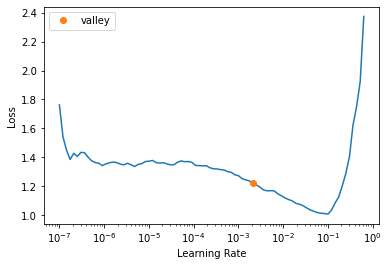

In [57]:
learn.lr_find()

In [58]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.413441,3.023726,0.220000,00:05


In [59]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.117561,1.511420,0.340000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.037805,1.074466,0.520000,00:06
1,0.973362,0.690999,0.720000,00:06
2,0.950185,0.567125,0.800000,00:06
3,0.918123,0.473271,0.800000,00:06
4,0.866133,0.448642,0.800000,00:06


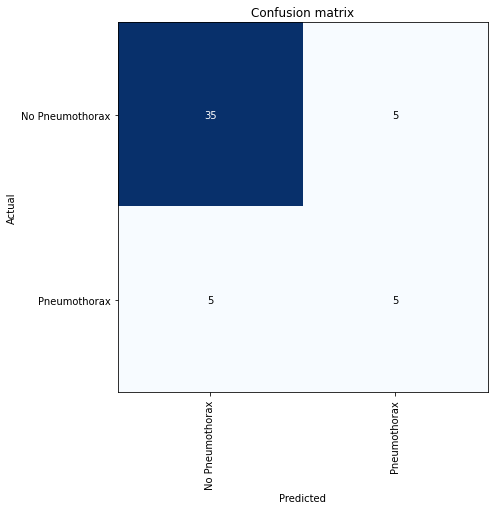

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))


In [50]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.568551,0.915016,0.740000,00:06


# Creating a GUI

In [26]:
from fastbook import *
from fastai.vision.widgets import *

In [61]:
learn.export()

In [41]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [62]:
learn_inf = load_learner('export.pkl')

In [63]:
learn_inf.predict(pneumothorax_source/f"train/Pneumothorax/000004.dcm")

('Pneumothorax', TensorBase(1), TensorBase([0.3323, 0.6677]))

In [78]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [79]:
dicom = (btn_upload.data[-1])

In [80]:
pred, pred_idx, probs = learn_inf.predict(dicom)

In [81]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Pneumothorax; Probability: 0.7477')